In [39]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [11]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=20

In [12]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [13]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[0 2 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0]


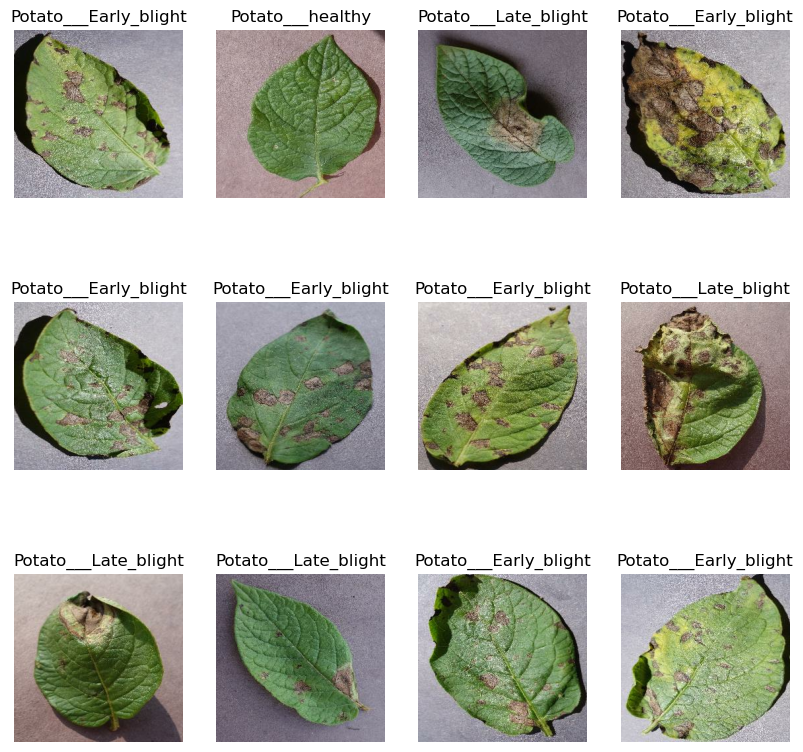

In [14]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [15]:
train_size =0.8
len(dataset)*train_size

54.400000000000006

In [16]:
train_ds= dataset.take(54)
len(train_ds)

54

In [17]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [18]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [19]:
val_ds= test_ds.take(6)
len(val_ds)

6

In [20]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [21]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+val_split+test_split)==1
    
    ds_size=len(ds)
    if shuffle:
        ds= ds.shuffle(shuffle_size, seed=12)
    train_size=int(train_split*ds_size)
    val_size = int(val_split*ds_size)
        
    train_ds=ds.take(train_size)
    val_ds= ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [23]:
len(train_ds)

54

In [24]:
len(val_ds)

6

In [25]:
len(test_ds)

8

In [26]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.4627451  0.41960785 0.4745098 ]
  [0.45490196 0.4117647  0.46666667]
  [0.44705883 0.40392157 0.45882353]
  ...
  [0.5372549  0.49803922 0.5411765 ]
  [0.54901963 0.50980395 0.5529412 ]
  [0.5529412  0.5137255  0.5568628 ]]

 [[0.44705883 0.40392157 0.45882353]
  [0.4392157  0.39607844 0.4509804 ]
  [0.42745098 0.38431373 0.4392157 ]
  ...
  [0.5686275  0.5294118  0.57254905]
  [0.5764706  0.5372549  0.5803922 ]
  [0.5686275  0.5294118  0.57254905]]

 [[0.45490196 0.4117647  0.46666667]
  [0.44705883 0.40392157 0.45882353]
  [0.43529412 0.39215687 0.44705883]
  ...
  [0.5647059  0.5254902  0.5686275 ]
  [0.5568628  0.5176471  0.56078434]
  [0.5372549  0.49803922 0.5411765 ]]

 ...

 [[0.5137255  0.47058824 0.5254902 ]
  [0.49803922 0.45490196 0.50980395]
  [0.4862745  0.44313726 0.49803922]
  ...
  [0.6313726  0.5921569  0.63529414]
  [0.6313726  0.5921569  0.63529414]
  [0.60784316 0.5686275  0.6117647 ]]

 [[0.52156866 0.47843137 0.53333336]
  [0.5137255  0.47058824 0.5254902 ]


In [28]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]
)

In [29]:
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [30]:
input_shape=(BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes=3
model= models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=input_shape)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/20
54/54 [==============================] - 12070s 228s/step - loss: 0.9290 - accuracy: 0.4670 - val_loss: 0.9259 - val_accuracy: 0.4896
Epoch 2/20
54/54 [==============================] - 102s 2s/step - loss: 0.7496 - accuracy: 0.6244 - val_loss: 0.6162 - val_accuracy: 0.6771
Epoch 3/20
54/54 [==============================] - 98s 2s/step - loss: 0.4697 - accuracy: 0.7922 - val_loss: 0.5199 - val_accuracy: 0.7344
Epoch 4/20
54/54 [==============================] - 102s 2s/step - loss: 0.4297 - accuracy: 0.8200 - val_loss: 0.3532 - val_accuracy: 0.8594
Epoch 5/20
54/54 [==============================] - 100s 2s/step - loss: 0.3233 - accuracy: 0.8582 - val_loss: 0.6013 - val_accuracy: 0.7292
Epoch 6/20
54/54 [==============================] - 102s 2s/step - loss: 0.3212 - accuracy: 0.8652 - val_loss: 0.2557 - val_accuracy: 0.8906
Epoch 7/20
54/54 [==============================] - 100s 2s/step - loss: 0.2307 - accuracy: 0.9115 - val_loss: 0.2247 - val_accuracy: 0.9062
Epoch 8/20

In [34]:
scores= model.evaluate(test_ds)


8/8 [==============================] - 5s 449ms/step - loss: 0.0941 - accuracy: 0.9492


In [35]:
scores


[0.09412384778261185, 0.94921875]

In [36]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss= history.history['loss']
val_loss= history.history['val_loss']

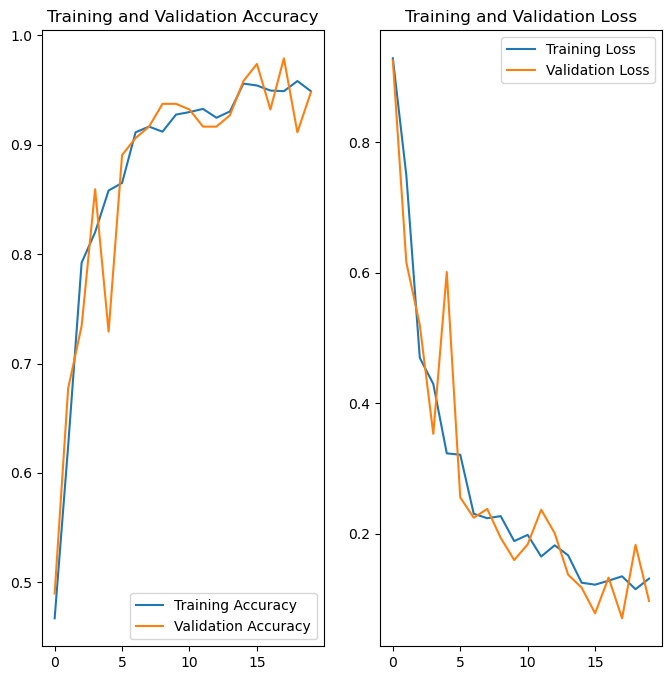

In [40]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


First image to predict
Actual Label: Potato___Late_blight
1/1 [==============================] - 1s 560ms/step
Predicted Label: Potato___Late_blight


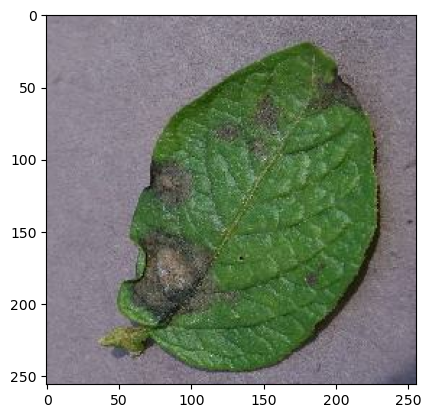

In [41]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:", class_names[labels_batch[0].numpy()])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [42]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence= round(100 *(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 35ms/step


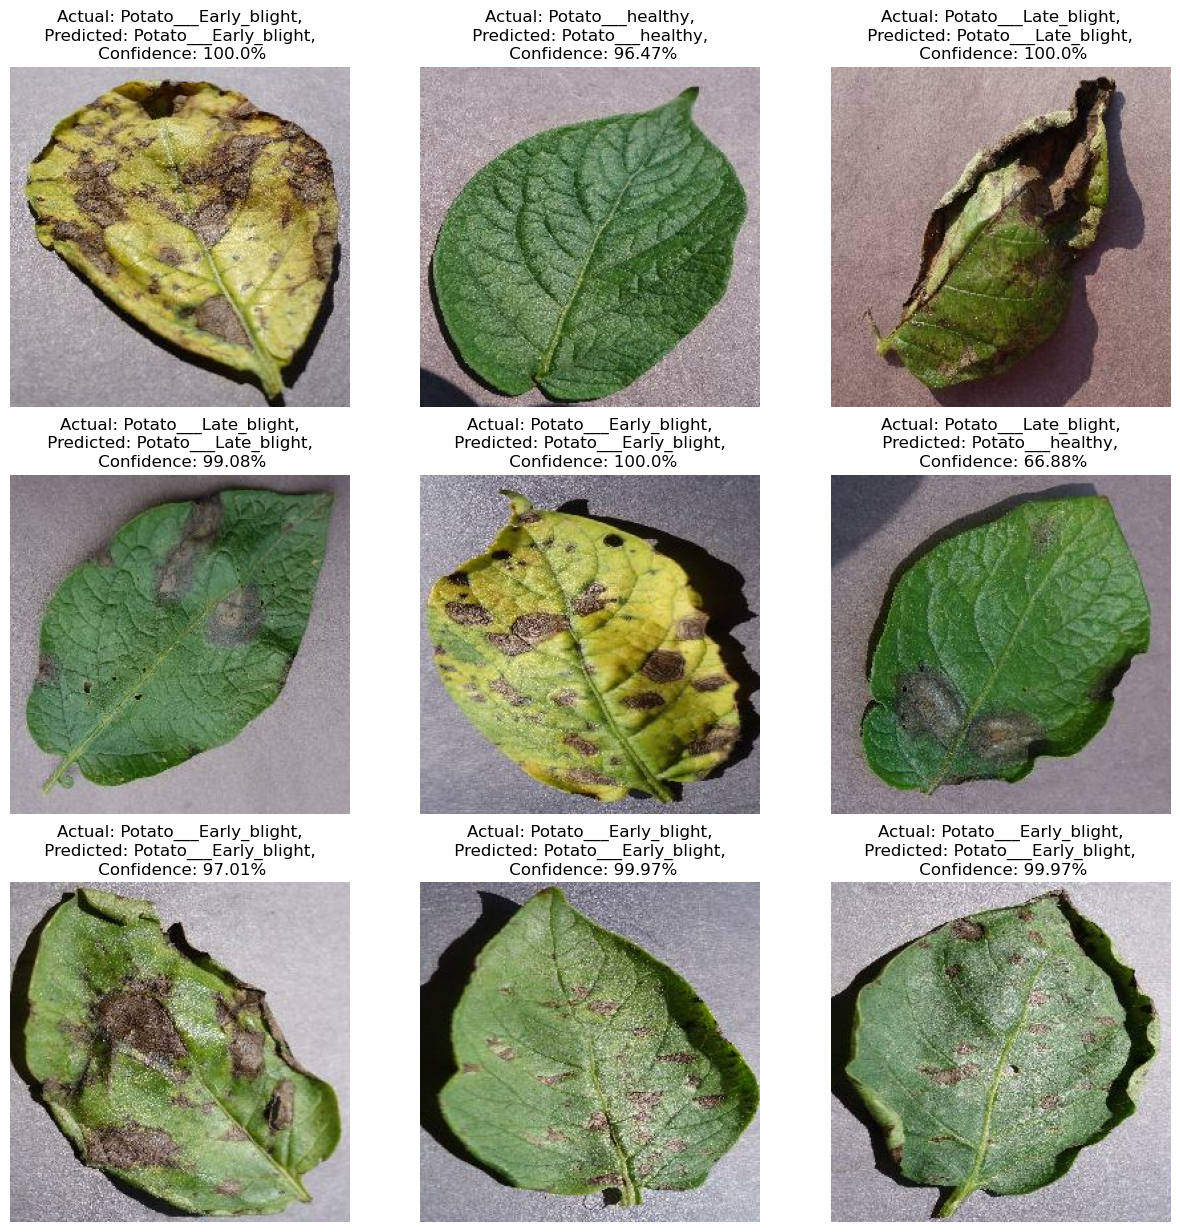

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        plt.axis("off")

In [ ]:
model_version =1
model.save(f"./models/{model_version}")